In [1]:
import numpy as np
import gym
import matplotlib.pyplot as plt

In [2]:
env = gym.make("CartPole-v1")
state = env.reset()
state
# position, velocity, angle, angular velocity

array([ 0.00243197, -0.04045838,  0.03059702,  0.03196711])

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from collections import deque
import random
import tensorflow as tf

In [4]:
model = Sequential()
model.add(Dense(units = 50, input_dim=4, activation='relu'))
model.add(Dense(units = 50, activation = "relu"))
model.add(Dense(units = 2, activation = "linear"))

In [5]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
#opt = tf.keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='MSE',optimizer=opt)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                250       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 2)                 102       
                                                                 
Total params: 2,902
Trainable params: 2,902
Non-trainable params: 0
_________________________________________________________________


Parametry:

In [6]:
train_episodes = 100
epsilon = 0.16
gamma = 0.99
max_steps = 50

Definiujemy **pamięć** jako kolejkę:

In [7]:
memory = deque(maxlen=100)

Ustalamy rozmiar **batch**:

In [8]:
batch_size = 10

In [9]:
def train():
  state_batch, Qs_target_batch = [], []
  
  minibatch = random.sample(memory, batch_size)
      
  for state, action, reward, next_state, done in minibatch:

    if done:
      y = reward
    else:
      y = reward + gamma*np.max(model.predict(next_state)[0])

    Q_target = model.predict(state)
    Q_target[0][action] = y
          
    state_batch.append(state)
    Qs_target_batch.append(Q_target)      
  
  state_batch = np.array(state_batch).reshape(batch_size,4)
  Qs_target_batch = np.array(Qs_target_batch).reshape(batch_size,2)

  h = model.fit(state_batch,Qs_target_batch,epochs=1,verbose=0)

  loss = h.history['loss'][0]

  return loss

In [10]:
Loss = []
Rewards = []

for e in range(1, train_episodes+1):
  total_reward = 0
  t = 0

  state = env.reset()
  state = np.reshape(state, [1, 4])  
  
  done = False
  while t < max_steps and done == False:
      
    Qs = model.predict(state)[0]

    if np.random.rand()<epsilon:
      action = env.action_space.sample()
    else:
      action = np.argmax(Qs)
    
    next_state, reward, done, _ = env.step(action)
    next_state = np.reshape(next_state, [1, 4])
    
    total_reward += reward

    memory.append((state,action,reward,next_state,done))

    if batch_size < len(memory):
      loss = train()
      Loss.append(loss)

    state = next_state
    t+=1
  
  print(e," R=",total_reward)
  Rewards.append(total_reward)

1  R= 50.0
2  R= 50.0
3  R= 39.0
4  R= 35.0
5  R= 19.0
6  R= 24.0
7  R= 40.0
8  R= 50.0
9  R= 50.0
10  R= 50.0
11  R= 47.0
12  R= 45.0
13  R= 11.0
14  R= 10.0
15  R= 9.0
16  R= 11.0
17  R= 10.0
18  R= 13.0
19  R= 24.0
20  R= 14.0
21  R= 9.0
22  R= 12.0
23  R= 11.0
24  R= 18.0
25  R= 18.0
26  R= 14.0
27  R= 11.0
28  R= 12.0
29  R= 10.0
30  R= 10.0
31  R= 10.0
32  R= 10.0
33  R= 10.0
34  R= 10.0
35  R= 8.0
36  R= 11.0
37  R= 10.0
38  R= 10.0
39  R= 11.0
40  R= 14.0
41  R= 23.0
42  R= 16.0
43  R= 14.0
44  R= 9.0
45  R= 12.0
46  R= 10.0
47  R= 9.0
48  R= 9.0
49  R= 18.0
50  R= 16.0
51  R= 50.0
52  R= 50.0
53  R= 50.0
54  R= 50.0
55  R= 31.0
56  R= 30.0
57  R= 50.0
58  R= 50.0
59  R= 50.0
60  R= 50.0
61  R= 50.0
62  R= 50.0
63  R= 47.0
64  R= 21.0
65  R= 16.0
66  R= 16.0
67  R= 20.0
68  R= 14.0
69  R= 12.0
70  R= 12.0
71  R= 19.0
72  R= 20.0
73  R= 50.0
74  R= 22.0
75  R= 15.0
76  R= 10.0
77  R= 8.0
78  R= 12.0
79  R= 8.0
80  R= 9.0
81  R= 8.0
82  R= 11.0
83  R= 13.0
84  R= 21.0
85  R= 50.0

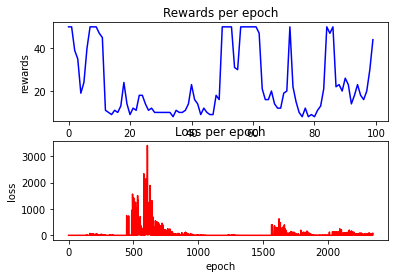

In [13]:
plt.subplot(211)
plt.ylabel('rewards')  
plt.title('Rewards per epoch')
plt.plot(range(len(Rewards)),Rewards,"b")

plt.subplot(212)
plt.xlabel('epoch')
plt.ylabel('loss')  
plt.title('Loss per epoch')
plt.plot(range(len(Loss)),Loss,"r")

plt.show()